<a href="https://colab.research.google.com/github/Ssurf777/U-Net_pipe_flow/blob/main/DeepXDE_pipe_flow_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CFD datasets import

In [1]:
import numpy as np
import requests

url = 'https://github.com/Ssurf777/U-Net_pipe_flow/raw/main/data/cfd_data.npy'
r = requests.get(url)

with open('cfd_data.npy', 'wb') as f:
  f.write(r.content)

data = np.load('cfd_data.npy')
data.shape


(163390, 7)

# Visualization datasets

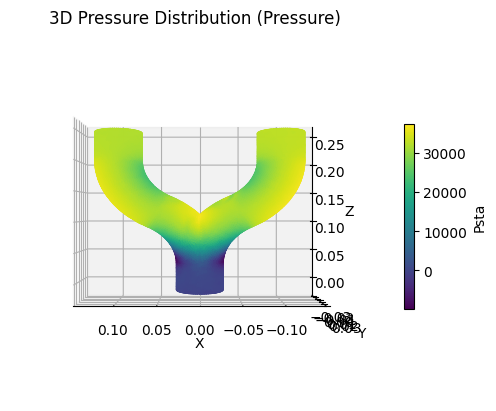

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# x, y, z, psta „ÇíÊÉ≥ÂÆöÈÄö„ÇäÂèñÂæó„Åó„Å¶„ÅÑ„ÇãÂâçÊèê
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]
psta = data[:, 6]

# „Ç´„É©„Éº„Éû„ÉÉ„Éó‰ªò„Åç„ÅÆ3DÊï£Â∏ÉÂõ≥
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(x, y, z, c=psta, cmap='viridis', s=1)  # psta„ÇíËâ≤„Å®„Åó„Å¶ÊåáÂÆö

# „Ç´„É©„Éº„Éê„ÉºËøΩÂä†
cbar = plt.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label('Psta')

# „É©„Éô„É´„ÇÑ„Éì„É•„ÉºË®≠ÂÆö
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Pressure Distribution (Pressure)')
ax.view_init(elev=0, azim=90)

plt.show()


In [9]:
u_ave = data[:, 3].mean()
v_ave = data[:, 4].mean()
w_ave = data[:, 5].mean()
p_ave = data[:, 6].mean()
print(u_ave, v_ave, w_ave, p_ave)

-0.11899725 0.018432401 -99.79088 26749.492


# k3d Visualization

In [10]:
!pip install k3d

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23.1/23.1 MB 77.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 40.4 MB/s eta 0:00:00


In [11]:
import k3d
import numpy as np
from k3d.colormaps import matplotlib_color_maps
import os

# === „Éá„Éº„ÇøÊ∫ñÂÇô ===
x, y, z = data[:, 0], data[:, 1], data[:, 2]
pressure = data[:, 6]
positions = np.vstack([x, y, z]).T.astype(np.float32)
pressure_flat = pressure.flatten().astype(np.float32)

# === K3D„Éó„É≠„ÉÉ„Éà‰ΩúÊàê ===
plot = k3d.plot()

plt_points = k3d.points(positions=positions,
                        point_size=0.01,            # ÈÅ©ÂÆúË™øÊï¥
                        attribute=pressure_flat,    # „Ç´„É©„Éº„Éû„ÉÉ„Éó„ÅÆÂØæË±°
                        color_map=matplotlib_color_maps.Jet,
                        opacity=0.8,                # ÂçäÈÄèÊòé
                        shader='3d')

plot += plt_points

# === ÁµêÊûú‰øùÂ≠ò ===
result_folder = './results'
os.makedirs(result_folder, exist_ok=True)

with open(result_folder + '/pressure_visualization.html', 'w') as fp:
    fp.write(plot.get_snapshot())

print('‚úÖ ÂèØË¶ñÂåñHTML„Çí‰øùÂ≠ò„Åó„Åæ„Åó„Åü: ', result_folder + '/pressure_visualization.html')


‚úÖ ÂèØË¶ñÂåñHTML„Çí‰øùÂ≠ò„Åó„Åæ„Åó„Åü:  ./results/pressure_visualization.html


# DeepXDE Install

In [8]:
!pip install deepxde

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.2/194.2 kB 4.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 107.8/107.8 kB 5.7 MB/s eta 0:00:00


In [12]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import re

No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


In [ ]:
# „Ç≥„Ç≥ÈáçË¶Å„Éá„Éº„Çø„ÅÆÂÆöÁæ©
'''
[ob_x, ob_y, ob_t, ob_u, ob_v, ob_p] = load_training_data(num=7000)
print("ob_y.shape", ob_y.shape)
print("ob_t.shape", ob_t.shape)
ob_xyt = np.hstack((ob_x, ob_y, ob_t))
print("ob_xyt.shape", ob_xyt.shape)
'''

In [14]:
# PDE„É≠„ÇπÁî®„ÅÆÂÆöÁæ©
def Navier_Stokes_Equation(x, y):
    u = y[:, 0:1]
    v = y[:, 1:2]
    w = y[:, 2:3]
    p = y[:, 3:4]

    # ‰∏ÄÈöéÂæÆÂàÜ
    du_dx = dde.grad.jacobian(y, x, i=0, j=0)
    du_dy = dde.grad.jacobian(y, x, i=0, j=1)
    du_dz = dde.grad.jacobian(y, x, i=0, j=2)

    dv_dx = dde.grad.jacobian(y, x, i=1, j=0)
    dv_dy = dde.grad.jacobian(y, x, i=1, j=1)
    dv_dz = dde.grad.jacobian(y, x, i=1, j=2)

    dw_dx = dde.grad.jacobian(y, x, i=2, j=0)
    dw_dy = dde.grad.jacobian(y, x, i=2, j=1)
    dw_dz = dde.grad.jacobian(y, x, i=2, j=2)

    dp_dx = dde.grad.jacobian(y, x, i=3, j=0)
    dp_dy = dde.grad.jacobian(y, x, i=3, j=1)
    dp_dz = dde.grad.jacobian(y, x, i=3, j=2)

    # ‰∫åÈöéÂæÆÂàÜÔºà„É©„Éó„É©„Ç∑„Ç¢„É≥È†ÖÔºâ
    d2u_dx2 = dde.grad.hessian(y, x, component=0, i=0, j=0)
    d2u_dy2 = dde.grad.hessian(y, x, component=0, i=1, j=1)
    d2u_dz2 = dde.grad.hessian(y, x, component=0, i=2, j=2)

    d2v_dx2 = dde.grad.hessian(y, x, component=1, i=0, j=0)
    d2v_dy2 = dde.grad.hessian(y, x, component=1, i=1, j=1)
    d2v_dz2 = dde.grad.hessian(y, x, component=1, i=2, j=2)

    d2w_dx2 = dde.grad.hessian(y, x, component=2, i=0, j=0)
    d2w_dy2 = dde.grad.hessian(y, x, component=2, i=1, j=1)
    d2w_dz2 = dde.grad.hessian(y, x, component=2, i=2, j=2)

    # ÈÄ£Á∂ö„ÅÆÂºè
    continuity = du_dx + dv_dy + dw_dz

    # ÈÅãÂãïÈáè‰øùÂ≠òÂºèÔºàÂÆöÂ∏∏Ôºâ C1 = rho, C2 = mu
    x_momentum = C1 * (u * du_dx + v * du_dy + w * du_dz) + dp_dx - C2 * (d2u_dx2 + d2u_dy2 + d2u_dz2)
    y_momentum = C1 * (u * dv_dx + v * dv_dy + w * dv_dz) + dp_dy - C2 * (d2v_dx2 + d2v_dy2 + d2v_dz2)
    z_momentum = C1 * (u * dw_dx + v * dw_dy + w * dw_dz) + dp_dz - C2 * (d2w_dx2 + d2w_dy2 + d2w_dz2)

    return [continuity, x_momentum, y_momentum, z_momentum]


In [13]:
# definet the DNN
layer_size = [3] + [50] * 10 + [4]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

In [15]:
# BC„ÇíÂÆöÁæ©„ÄÄ„Åü„Å®„Åà„Å∞ÂÖ•„ÇäÂè£„ÅÆÂúßÂäõ„ÇíMax„ÅßË®≠ÂÆö„Åô„Çã„Å™„Å©

In [ ]:
# MSE„ÇíÂèñ„ÇãCAE„Éá„Éº„Çø„Å®„ÅÆÊ®°ÂÄ£Â≠¶Áøí
'''
observe_u = dde.icbc.PointSetBC(ob_xyt, ob_u, component=0)
observe_v = dde.icbc.PointSetBC(ob_xyt, ob_v, component=1)
observe_w = dde.icbc.PointSetBC(ob_xyt, ob_v, component=2)
observe_p = dde.icbc.PointSetBC(ob_xyt, ob_p, component=3)
'''

# U-Net define

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def mish(x):
    return x * torch.tanh(F.softplus(x))

def init_weights_kaiming(module):
    if isinstance(module, nn.Conv1d):
        nn.init.kaiming_normal_(module.weight, mode='fan_in', nonlinearity='relu')  # MishÁî®„ÅÆHe„ÇÇreluÊåáÂÆö„ÅßÂïèÈ°å„Å™„Åó
        if module.bias is not None:
            nn.init.zeros_(module.bias)

def init_weights_xavier(module):
    if isinstance(module, nn.Conv1d):
        gain = nn.init.calculate_gain('tanh')  # tanh „Å´ÊúÄÈÅ©„Å™ gain „ÇíË®àÁÆó
        nn.init.xavier_normal_(module.weight, gain=gain)
        if module.bias is not None:
            nn.init.zeros_(module.bias)


class PointNetEncoder(nn.Module):
    def __init__(self, in_channels=3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, 64, 1)
        self.conv2 = nn.Conv1d(64, 128, 1)
        self.conv3 = nn.Conv1d(128, 256, 1)
        self.apply(init_weights_xavier)

    def forward(self, x):
        x = x.transpose(1, 2)        # [B, 3, N]
        x1 = F.tanh(self.conv1(x))     # [B, 64, N]
        x2 = F.tanh(self.conv2(x1))    # [B, 128, N]
        x3 = F.tanh(self.conv3(x2))    # [B, 256, N]
        return x1, x2, x3

class PointNetDecoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.upconv1 = nn.Conv1d(256 + 128, 128, 1)
        self.upconv2 = nn.Conv1d(128 + 64, 64, 1)
        self.out = nn.Conv1d(64, 4, 1)
        self.apply(init_weights_xavier)

    def forward(self, x1, x2, x3):
        up1 = F.tanh(self.upconv1(torch.cat([x3, x2], dim=1)))  # [B, 128, N]
        up2 = F.tanh(self.upconv2(torch.cat([up1, x1], dim=1))) # [B, 64, N]
        out = self.out(up2)                                   # [B, 4, N]
        return out.transpose(1, 2)                            # [B, N, 4]

class PointUNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = PointNetEncoder()
        self.decoder = PointNetDecoder()

    def forward(self, x):  # x: [B, N, 3]
        x1, x2, x3 = self.encoder(x)
        out = self.decoder(x1, x2, x3)
        return out  # [B, N, 4]


# dataloader

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class CFDDataset(Dataset):
    def __init__(self, data_path):
        super().__init__()
        data = np.load(data_path)  # shape: (N, 7)
        self.inputs = data[:, 0:3].astype(np.float32)  # x, y, z
        self.targets = data[:, 3:7].astype(np.float32)  # u, v, w, p
        #self.targets = data[:, 6].astype(np.float32)  # p

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]


In [ ]:
'''
class CFDPointCloudDataset(torch.utils.data.Dataset):
    def __init__(self, data_path, n_points=1024):
        data = np.load(data_path).astype(np.float32)  # shape: [N_total, 7]
        self.n_points = n_points
        self.inputs = data[:, 0:3]
        self.raw_targets = data[:, 3:7]
        #self.raw_targets = data[:, 6]

        self.p_min = self.raw_targets.min()
        self.p_max = self.raw_targets.max()
        self.targets = (self.raw_targets - self.p_min) / (self.p_max - self.p_min)

        total_points = len(self.inputs)
        total_groups = total_points // n_points
        self.inputs = self.inputs[:total_groups * n_points].reshape(total_groups, n_points, 3)
        self.targets = self.targets[:total_groups * n_points].reshape(total_groups, n_points, 4)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

    def inverse_transform(self, norm_p):
        return norm_p * (self.p_max - self.p_min) + self.p_min
'''

'\nclass CFDPointCloudDataset(torch.utils.data.Dataset):\n    def __init__(self, data_path, n_points=1024):\n        data = np.load(data_path).astype(np.float32)  # shape: [N_total, 7]\n        self.n_points = n_points\n        self.inputs = data[:, 0:3]\n        self.raw_targets = data[:, 3:7]\n        #self.raw_targets = data[:, 6]\n\n        self.p_min = self.raw_targets.min()\n        self.p_max = self.raw_targets.max()\n        self.targets = (self.raw_targets - self.p_min) / (self.p_max - self.p_min)\n\n        total_points = len(self.inputs)\n        total_groups = total_points // n_points\n        self.inputs = self.inputs[:total_groups * n_points].reshape(total_groups, n_points, 3)\n        self.targets = self.targets[:total_groups * n_points].reshape(total_groups, n_points, 4)\n\n    def __len__(self):\n        return len(self.inputs)\n\n    def __getitem__(self, idx):\n        return self.inputs[idx], self.targets[idx]\n\n    def inverse_transform(self, norm_p):\n        ret

In [ ]:
class CFDPointCloudDataset(torch.utils.data.Dataset):
    def __init__(self, data_path, n_points=1024):
        data = np.load(data_path).astype(np.float32)  # shape: [N_total, 7]
        self.n_points = n_points

        self.inputs = data[:, 0:3]
        self.raw_targets = data[:, 3:7]  # [u, v, w, p]

        # --- „Çπ„Ç±„Éº„É™„É≥„Ç∞ ---
        u, v, w, p = self.raw_targets[:, 0], self.raw_targets[:, 1], self.raw_targets[:, 2], self.raw_targets[:, 3]

        # Ê®ôÊ∫ñÂåñ: u, v, w
        self.u_mean, self.u_std = u.mean(), u.std()
        self.v_mean, self.v_std = v.mean(), v.std()
        self.w_mean, self.w_std = w.mean(), w.std()

        u_scaled = (u - self.u_mean) / self.u_std
        v_scaled = (v - self.v_mean) / self.v_std
        w_scaled = (w - self.w_mean) / self.w_std

        # Min-Max: p
        self.p_min, self.p_max = p.min(), p.max()
        p_scaled = (p - self.p_min) / (self.p_max - self.p_min)

        self.targets = np.stack([u_scaled, v_scaled, w_scaled, p_scaled], axis=1)

        total_points = len(self.inputs)
        total_groups = total_points // n_points
        self.inputs = self.inputs[:total_groups * n_points].reshape(total_groups, n_points, 3)
        self.targets = self.targets[:total_groups * n_points].reshape(total_groups, n_points, 4)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

    def inverse_transform(self, norm_targets):
        u = norm_targets[..., 0] * self.u_std + self.u_mean
        v = norm_targets[..., 1] * self.v_std + self.v_mean
        w = norm_targets[..., 2] * self.w_std + self.w_mean
        p = norm_targets[..., 3] * (self.p_max - self.p_min) + self.p_min
        return np.stack([u, v, w, p], axis=-1)


In [ ]:
# „Éá„Éº„ÇøË™≠„ÅøËæº„Åø
train_dataset = CFDPointCloudDataset('cfd_data.npy')
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=False, drop_last=False)

# note
Áã¨Á´ãÁÇπÁæ§„ÅÆ„Åü„ÇÅ„ÄÅ‰ªäÂæå„ÅØk-means„Å™„Å©„ÅßËøëË∑ùÈõ¢ÁÇπÁæ§„ÇíÈõÜ„ÇÅ„Å¶„Éê„ÉÉ„ÉÅÂåñ„Åó„Å¶Â≠¶Áøí„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„Çã„Åì„Å®

# Trainer

In [7]:
from torch import nn, optim
from tqdm import tqdm
import matplotlib.pyplot as plt

# Training Loop (with loss tracking)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PointUNet().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

num_epochs = 10000
loss_history = [] # „É™„Çπ„Éà„ÇíÂàùÊúüÂåñ„Åó„Å¶loss„Çí‰øùÂ≠ò


for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    epoch_u_loss = 0.0
    epoch_v_loss = 0.0
    epoch_w_loss = 0.0
    epoch_p_loss = 0.0

    for batch_inputs, batch_targets in train_loader:
        batch_inputs = batch_inputs.to(device)    # [B, N, 3]
        batch_targets = batch_targets.to(device)  # [B, N, 4]
        outputs = model(batch_inputs)             # [B, N, 4]

        optimizer.zero_grad()

        u_loss = criterion(outputs[:, :, 0], batch_targets[:, :, 0])
        v_loss = criterion(outputs[:, :, 1], batch_targets[:, :, 1])
        w_loss = criterion(outputs[:, :, 2], batch_targets[:, :, 2])
        p_loss = criterion(outputs[:, :, 3], batch_targets[:, :, 3])


        p_weight = 1  # „Åæ„Åü„ÅØ 3e-5
        loss = u_loss + v_loss + w_loss + p_weight * p_loss
        #loss = u_loss + v_loss + w_loss + p_loss
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_u_loss += u_loss.item()
        epoch_v_loss += v_loss.item()
        epoch_w_loss += w_loss.item()
        epoch_p_loss += p_loss.item()

    avg_epoch_loss = epoch_loss / len(train_loader)
    avg_u_loss = epoch_u_loss / len(train_loader)
    avg_v_loss = epoch_v_loss / len(train_loader)
    avg_w_loss = epoch_w_loss / len(train_loader)
    avg_p_loss = epoch_p_loss / len(train_loader)

    loss_history.append(avg_epoch_loss)

    if (epoch + 1) % 500 == 0 or epoch == 0:
        print(f"Epoch {epoch+1:>4} - Total Loss: {avg_epoch_loss:.6f} | u: {avg_u_loss:.6f}, v: {avg_v_loss:.6f}, w: {avg_w_loss:.6f}, p: {avg_p_loss:.6f}")


NameError: name 'torch' is not defined

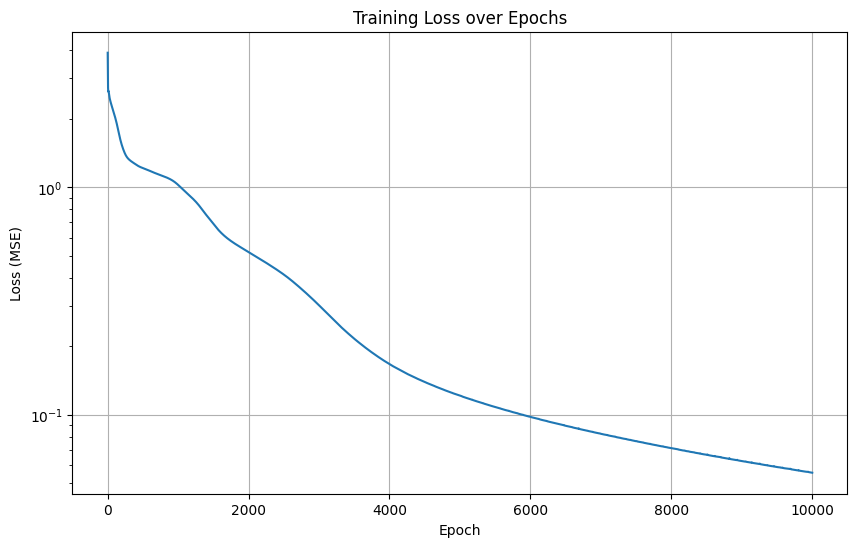

In [ ]:
# prompt: plt.y„Çílog„Å´„Åó„Å¶

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss over Epochs')
plt.yscale('log')  # „Åì„Åì„ÅßyËª∏„ÇíÂØæÊï∞„Çπ„Ç±„Éº„É´„Å´Ë®≠ÂÆö
plt.grid(True)
plt.show()


# Evaluation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from tqdm import tqdm
import torch

model.eval()
all_predictions = []
all_targets = []

with torch.no_grad():
    for batch_inputs, batch_targets in tqdm(train_loader, desc="Predicting"):
        batch_inputs = batch_inputs.to(device)    # [B, N, 3]
        batch_targets = batch_targets.to(device)  # [B, N, 4]

        outputs = model(batch_inputs)             # [B, N, 4]
        u_pred = outputs[:, :, 0].cpu().numpy()   # ‚Üê u = index 0
        u_true = batch_targets[:, :, 0].cpu().numpy()

        all_predictions.append(u_pred)
        all_targets.append(u_true)

# ÁµêÂêà„Åó„Å¶ [N_all] „Å´
predicted_u_normalized = np.concatenate(all_predictions, axis=0).flatten()
target_u_normalized = np.concatenate(all_targets, axis=0).flatten()

# üí° u„ÅÆ„Åø„ÇíÂÖÉ„Çπ„Ç±„Éº„É´„Å´Êàª„ÅôÔºàmean, std„Çí‰Ωø„Å£„Å¶ÊâãÂãï„ÅßÂæ©ÂÖÉÔºâ
u_mean = train_dataset.u_mean
u_std = train_dataset.u_std

predicted_u_original = predicted_u_normalized * u_std + u_mean
target_u_original = target_u_normalized * u_std + u_mean

# R¬≤„Çπ„Ç≥„Ç¢
r2 = r2_score(target_u_original, predicted_u_original)
print(f"\nR¬≤ Score (u velocity): {r2:.4f}")

# ÂèØË¶ñÂåñ
plt.figure(figsize=(8, 6))
plt.scatter(target_u_original, predicted_u_original, alpha=0.5, s=1)
plt.xlabel("Actual u-velocity")
plt.ylabel("Predicted u-velocity")
plt.title("Actual vs. Predicted u-velocity")
plt.grid(True)

# ÂÆåÂÖ®‰∏ÄËá¥Á∑ö
min_val = min(target_u_original.min(), predicted_u_original.min())
max_val = max(target_u_original.max(), predicted_u_original.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.tight_layout()
plt.show()


Predicting: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 36.90it/s]



R¬≤ Score (u velocity): 0.9944


Predicting v: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 30.46it/s]



R¬≤ Score (v velocity): 0.9638


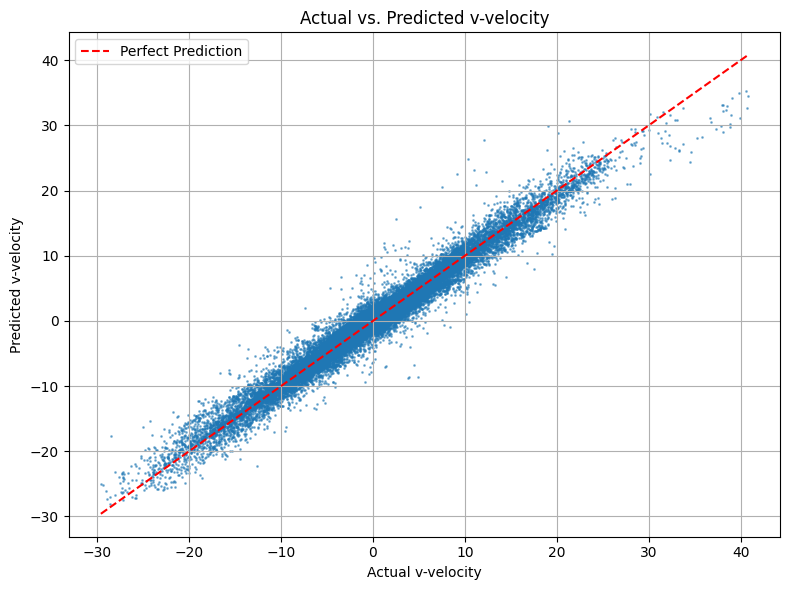

In [ ]:
# -------- v „ÅÆË©ï‰æ° --------
all_v_predictions = []
all_v_targets = []

with torch.no_grad():
    for batch_inputs, batch_targets in tqdm(train_loader, desc="Predicting v"):
        batch_inputs = batch_inputs.to(device)
        batch_targets = batch_targets.to(device)
        outputs = model(batch_inputs)

        v_pred = outputs[:, :, 1].cpu().numpy()  # v = index 1
        v_true = batch_targets[:, :, 1].cpu().numpy()

        all_v_predictions.append(v_pred)
        all_v_targets.append(v_true)

# „Éï„É©„ÉÉ„ÉàÂåñ
predicted_v_normalized = np.concatenate(all_v_predictions, axis=0).flatten()
target_v_normalized = np.concatenate(all_v_targets, axis=0).flatten()

# ÂÖÉ„Çπ„Ç±„Éº„É´„Å´Âæ©ÂÖÉ
v_mean = train_dataset.v_mean
v_std = train_dataset.v_std

predicted_v_original = predicted_v_normalized * v_std + v_mean
target_v_original = target_v_normalized * v_std + v_mean

# R¬≤ „Çπ„Ç≥„Ç¢
r2_v = r2_score(target_v_original, predicted_v_original)
print(f"\nR¬≤ Score (v velocity): {r2_v:.4f}")

# Êï£Â∏ÉÂõ≥„Éó„É≠„ÉÉ„Éà
plt.figure(figsize=(8, 6))
plt.scatter(target_v_original, predicted_v_original, alpha=0.5, s=1)
plt.xlabel("Actual v-velocity")
plt.ylabel("Predicted v-velocity")
plt.title("Actual vs. Predicted v-velocity")
plt.grid(True)

# ÂÆåÂÖ®‰∏ÄËá¥Á∑ö
min_val = min(target_v_original.min(), predicted_v_original.min())
max_val = max(target_v_original.max(), predicted_v_original.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.tight_layout()
plt.show()


Predicting w: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 31.63it/s]



R¬≤ Score (w velocity): 0.9866


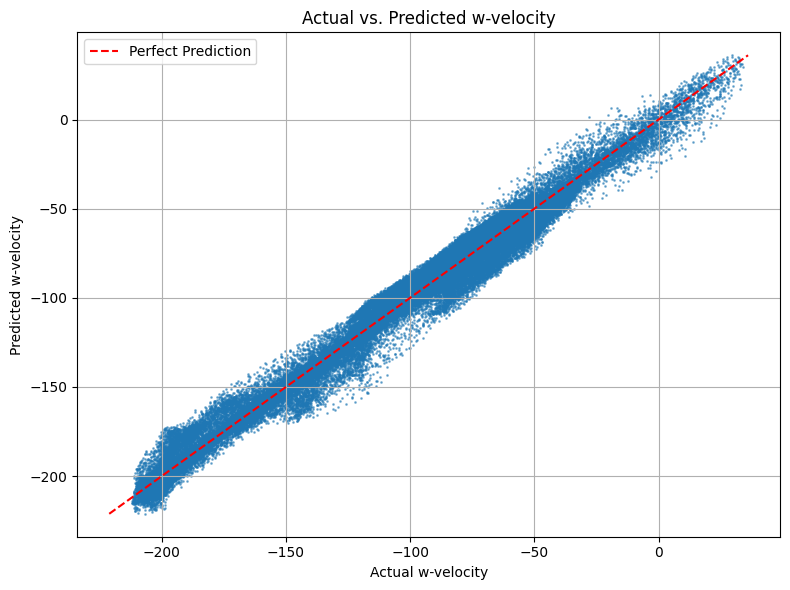

In [ ]:
# -------- w „ÅÆË©ï‰æ° --------
all_w_predictions = []
all_w_targets = []

with torch.no_grad():
    for batch_inputs, batch_targets in tqdm(train_loader, desc="Predicting w"):
        batch_inputs = batch_inputs.to(device)
        batch_targets = batch_targets.to(device)
        outputs = model(batch_inputs)

        w_pred = outputs[:, :, 2].cpu().numpy()  # w = index 2
        w_true = batch_targets[:, :, 2].cpu().numpy()

        all_w_predictions.append(w_pred)
        all_w_targets.append(w_true)

# „Éï„É©„ÉÉ„ÉàÂåñ
predicted_w_normalized = np.concatenate(all_w_predictions, axis=0).flatten()
target_w_normalized = np.concatenate(all_w_targets, axis=0).flatten()

# ÂÖÉ„Çπ„Ç±„Éº„É´„Å´Âæ©ÂÖÉ
w_mean = train_dataset.w_mean
w_std = train_dataset.w_std

predicted_w_original = predicted_w_normalized * w_std + w_mean
target_w_original = target_w_normalized * w_std + w_mean

# R¬≤ „Çπ„Ç≥„Ç¢
r2_w = r2_score(target_w_original, predicted_w_original)
print(f"\nR¬≤ Score (w velocity): {r2_w:.4f}")

# Êï£Â∏ÉÂõ≥„Éó„É≠„ÉÉ„Éà
plt.figure(figsize=(8, 6))
plt.scatter(target_w_original, predicted_w_original, alpha=0.5, s=1)
plt.xlabel("Actual w-velocity")
plt.ylabel("Predicted w-velocity")
plt.title("Actual vs. Predicted w-velocity")
plt.grid(True)

# ÂÆåÂÖ®‰∏ÄËá¥Á∑ö
min_val = min(target_w_original.min(), predicted_w_original.min())
max_val = max(target_w_original.max(), predicted_w_original.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.tight_layout()
plt.show()


Predicting p: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 32.58it/s]



R¬≤ Score (pressure): 0.9909


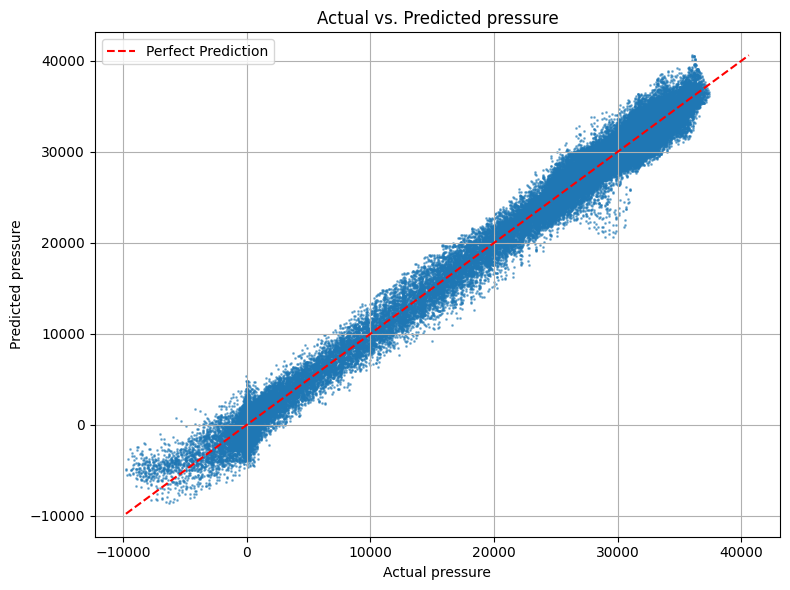

In [ ]:
# -------- p „ÅÆË©ï‰æ° --------
all_p_predictions = []
all_p_targets = []

with torch.no_grad():
    for batch_inputs, batch_targets in tqdm(train_loader, desc="Predicting p"):
        batch_inputs = batch_inputs.to(device)
        batch_targets = batch_targets.to(device)
        outputs = model(batch_inputs)

        p_pred = outputs[:, :, 3].cpu().numpy()  # p = index 3
        p_true = batch_targets[:, :, 3].cpu().numpy()

        all_p_predictions.append(p_pred)
        all_p_targets.append(p_true)

# „Éï„É©„ÉÉ„ÉàÂåñ
predicted_p_normalized = np.concatenate(all_p_predictions, axis=0).flatten()
target_p_normalized = np.concatenate(all_p_targets, axis=0).flatten()

# ÂÖÉ„Çπ„Ç±„Éº„É´„Å´Âæ©ÂÖÉÔºàmin-max scalingÔºâ
p_min = train_dataset.p_min
p_max = train_dataset.p_max

predicted_p_original = predicted_p_normalized * (p_max - p_min) + p_min
target_p_original = target_p_normalized * (p_max - p_min) + p_min

# R¬≤ „Çπ„Ç≥„Ç¢
r2_p = r2_score(target_p_original, predicted_p_original)
print(f"\nR¬≤ Score (pressure): {r2_p:.4f}")

# Êï£Â∏ÉÂõ≥„Éó„É≠„ÉÉ„Éà
plt.figure(figsize=(8, 6))
plt.scatter(target_p_original, predicted_p_original, alpha=0.5, s=1)
plt.xlabel("Actual pressure")
plt.ylabel("Predicted pressure")
plt.title("Actual vs. Predicted pressure")
plt.grid(True)

# ÂÆåÂÖ®‰∏ÄËá¥Á∑ö
min_val = min(target_p_original.min(), predicted_p_original.min())
max_val = max(target_p_original.max(), predicted_p_original.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.tight_layout()
plt.show()


# Counter

Predicting p: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 33.09it/s]


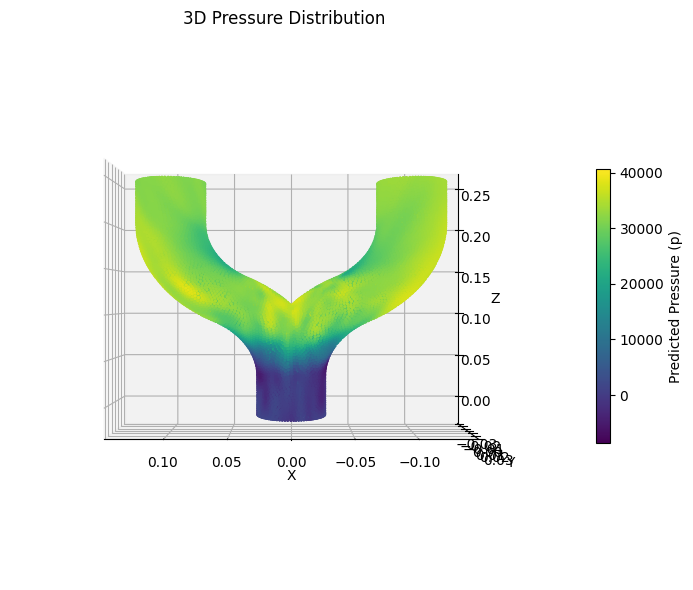

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from tqdm import tqdm
import torch

model.eval()
all_pred_p = []  # Êé®Ë´ñp [B, N]
all_xyz = []     # Â∫ßÊ®ô [B, N, 3]

with torch.no_grad():
    for batch_inputs, _ in tqdm(train_loader, desc="Predicting p"):
        batch_inputs = batch_inputs.to(device)         # [B, N, 3]
        outputs = model(batch_inputs)                  # [B, N, 4]
        p_pred = outputs[:, :, 3].cpu().numpy()        # [B, N]
        xyz = batch_inputs.cpu().numpy()               # [B, N, 3]

        all_pred_p.append(p_pred.reshape(-1))          # [B*N]
        all_xyz.append(xyz.reshape(-1, 3))             # [B*N, 3]

# ÁµêÂêà
p_pred_flat = np.concatenate(all_pred_p, axis=0)       # [total_points]
xyz_all = np.concatenate(all_xyz, axis=0)              # [total_points, 3]

# Ê≠£Ë¶èÂåñËß£Èô§
p_min = train_dataset.p_min
p_max = train_dataset.p_max
p_original = p_pred_flat * (p_max - p_min) + p_min     # ÂÖÉ„Çπ„Ç±„Éº„É´„Å´Âæ©ÂÖÉ

# ÂèØË¶ñÂåñ
x, y, z = xyz_all[:, 0], xyz_all[:, 1], xyz_all[:, 2]
assert len(p_original) == len(x), "Length mismatch in visualization!"

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(x, y, z, c=p_original, cmap='viridis', s=1)
cbar = plt.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label('Predicted Pressure (p)')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Pressure Distribution')
ax.view_init(elev=0, azim=90)  # Áúü‰∏ä„Åã„Çâ‰øØÁû∞
plt.tight_layout()
plt.show()


Predicting w: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 31.38it/s]


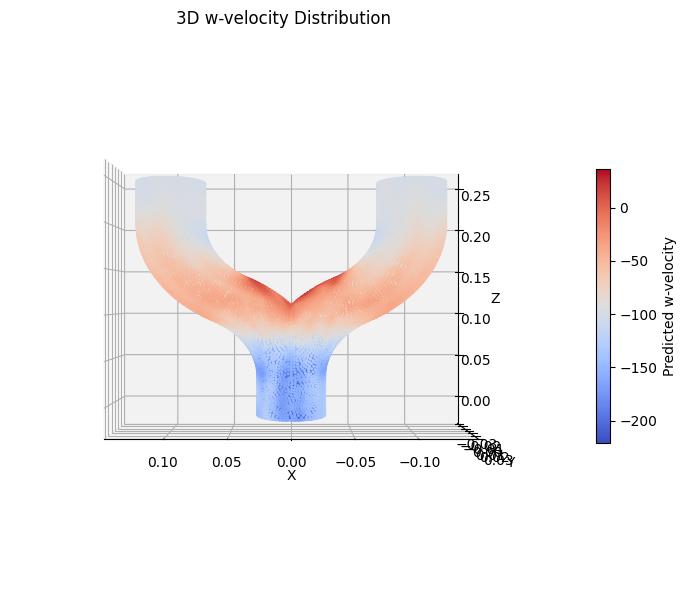

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from tqdm import tqdm
import torch

model.eval()
all_pred_w = []  # Êé®Ë´ñw [B, N]
all_xyz = []     # Â∫ßÊ®ô [B, N, 3]

with torch.no_grad():
    for batch_inputs, _ in tqdm(train_loader, desc="Predicting w"):
        batch_inputs = batch_inputs.to(device)         # [B, N, 3]
        outputs = model(batch_inputs)                  # [B, N, 4]
        w_pred = outputs[:, :, 2].cpu().numpy()        # w = index 2
        xyz = batch_inputs.cpu().numpy()               # [B, N, 3]

        all_pred_w.append(w_pred.reshape(-1))          # [B*N]
        all_xyz.append(xyz.reshape(-1, 3))             # [B*N, 3]

# ÁµêÂêà
w_pred_flat = np.concatenate(all_pred_w, axis=0)       # [total_points]
xyz_all = np.concatenate(all_xyz, axis=0)              # [total_points, 3]

# Ê≠£Ë¶èÂåñËß£Èô§ÔºàZ„Çπ„Ç≥„Ç¢ ‚Üí ÂÆüÂÄ§Ôºâ
w_mean = train_dataset.w_mean
w_std = train_dataset.w_std
w_original = w_pred_flat * w_std + w_mean              # ÂÖÉ„Çπ„Ç±„Éº„É´„Å´Âæ©ÂÖÉ

# ÂèØË¶ñÂåñ
x, y, z = xyz_all[:, 0], xyz_all[:, 1], xyz_all[:, 2]
assert len(w_original) == len(x), "Length mismatch in visualization!"

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(x, y, z, c=w_original, cmap='coolwarm', s=1)
cbar = plt.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label('Predicted w-velocity')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D w-velocity Distribution')
ax.view_init(elev=0, azim=90)
plt.tight_layout()
plt.show()


Predicting u: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 33.06it/s]


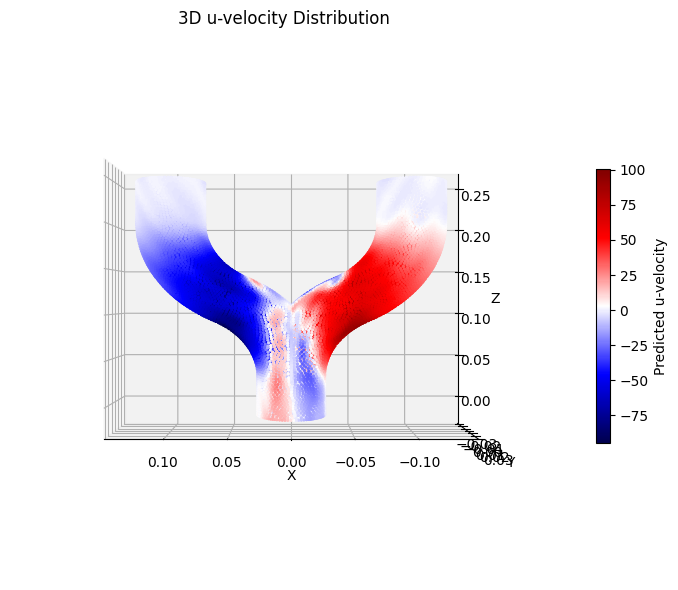

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from tqdm import tqdm
import torch

model.eval()
all_pred_u = []  # Êé®Ë´ñu [B, N]
all_xyz = []     # Â∫ßÊ®ô [B, N, 3]

with torch.no_grad():
    for batch_inputs, _ in tqdm(train_loader, desc="Predicting u"):
        batch_inputs = batch_inputs.to(device)         # [B, N, 3]
        outputs = model(batch_inputs)                  # [B, N, 4]
        u_pred = outputs[:, :, 0].cpu().numpy()        # u = index 0
        xyz = batch_inputs.cpu().numpy()               # [B, N, 3]

        all_pred_u.append(u_pred.reshape(-1))          # [B*N]
        all_xyz.append(xyz.reshape(-1, 3))             # [B*N, 3]

# ÁµêÂêà
u_pred_flat = np.concatenate(all_pred_u, axis=0)       # [total_points]
xyz_all = np.concatenate(all_xyz, axis=0)              # [total_points, 3]

# Ê≠£Ë¶èÂåñËß£Èô§ÔºàZ„Çπ„Ç≥„Ç¢ ‚Üí ÂÆü„Çπ„Ç±„Éº„É´Ôºâ
u_mean = train_dataset.u_mean
u_std = train_dataset.u_std
u_original = u_pred_flat * u_std + u_mean              # ÂÖÉ„Çπ„Ç±„Éº„É´„Å´Âæ©ÂÖÉ

# ÂèØË¶ñÂåñ
x, y, z = xyz_all[:, 0], xyz_all[:, 1], xyz_all[:, 2]
assert len(u_original) == len(x), "Length mismatch in visualization!"

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(x, y, z, c=u_original, cmap='seismic', s=1)
cbar = plt.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label('Predicted u-velocity')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D u-velocity Distribution')
ax.view_init(elev=0, azim=90)
plt.tight_layout()
plt.show()


Predicting v: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00, 12.65it/s]


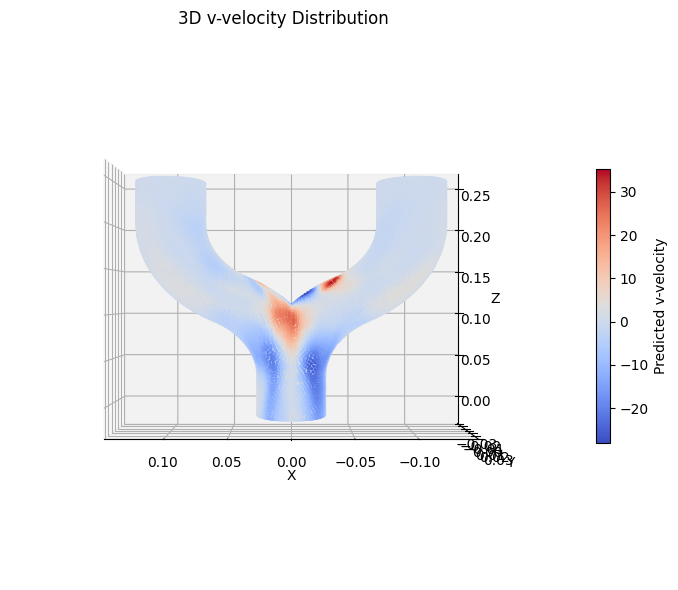

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from tqdm import tqdm
import torch

model.eval()
all_pred_v = []  # Êé®Ë´ñv [B, N]
all_xyz = []     # Â∫ßÊ®ô [B, N, 3]

with torch.no_grad():
    for batch_inputs, _ in tqdm(train_loader, desc="Predicting v"):
        batch_inputs = batch_inputs.to(device)         # [B, N, 3]
        outputs = model(batch_inputs)                  # [B, N, 4]
        v_pred = outputs[:, :, 1].cpu().numpy()        # v = index 1
        xyz = batch_inputs.cpu().numpy()               # [B, N, 3]

        all_pred_v.append(v_pred.reshape(-1))          # [B*N]
        all_xyz.append(xyz.reshape(-1, 3))             # [B*N, 3]

# ÁµêÂêà
v_pred_flat = np.concatenate(all_pred_v, axis=0)       # [total_points]
xyz_all = np.concatenate(all_xyz, axis=0)              # [total_points, 3]

# Ê≠£Ë¶èÂåñËß£Èô§ÔºàZ„Çπ„Ç≥„Ç¢ ‚Üí ÂÆü„Çπ„Ç±„Éº„É´Ôºâ
v_mean = train_dataset.v_mean
v_std = train_dataset.v_std
v_original = v_pred_flat * v_std + v_mean              # ÂÖÉ„Çπ„Ç±„Éº„É´„Å´Âæ©ÂÖÉ

# ÂèØË¶ñÂåñ
x, y, z = xyz_all[:, 0], xyz_all[:, 1], xyz_all[:, 2]
assert len(v_original) == len(x), "Length mismatch in visualization!"

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(x, y, z, c=v_original, cmap='coolwarm', s=1)
cbar = plt.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label('Predicted v-velocity')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D v-velocity Distribution')
ax.view_init(elev=0, azim=90)
plt.tight_layout()
plt.show()


# Individual scalre Training using U-Net

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import grad

# --------------------------------------------
# Mish Activation
# --------------------------------------------
def mish(x):
    return x * torch.tanh(F.softplus(x))

# --------------------------------------------
# Kaiming Initialization
# --------------------------------------------
def init_weights_kaiming(module):
    if isinstance(module, nn.Conv1d):
        nn.init.kaiming_normal_(module.weight, mode='fan_in', nonlinearity='relu')
        if module.bias is not None:
            nn.init.zeros_(module.bias)

# --------------------------------------------
# Simple PointNet-like U-Net Block for Scalar Output
# --------------------------------------------
class ScalarUNet(nn.Module):
    def __init__(self, in_channels=3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, 64, 1)
        self.conv2 = nn.Conv1d(64, 128, 1)
        self.conv3 = nn.Conv1d(128, 256, 1)

        self.up1 = nn.Conv1d(256 + 128, 128, 1)
        self.up2 = nn.Conv1d(128 + 64, 64, 1)
        self.out = nn.Conv1d(64, 1, 1)

        self.apply(init_weights_xavier)

    def forward(self, x):
        x = x.transpose(1, 2)  # [B, 3, N]
        x1 = mish(self.conv1(x))
        x2 = mish(self.conv2(x1))
        x3 = mish(self.conv3(x2))

        up1 = mish(self.up1(torch.cat([x3, x2], dim=1)))
        up2 = mish(self.up2(torch.cat([up1, x1], dim=1)))
        out = self.out(up2)  # [B, 1, N]
        return out.transpose(1, 2)  # [B, N, 1]

# --------------------------------------------
# Combined Model with 4 U-Nets and Physics Loss
# --------------------------------------------
class PhysicsInformedCFDModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net_u = ScalarUNet()
        self.net_v = ScalarUNet()
        self.net_w = ScalarUNet()
        self.net_p = ScalarUNet()

    def forward(self, coords):
        # coords: [B, N, 3] with requires_grad=True
        u = self.net_u(coords)  # [B, N, 1]
        v = self.net_v(coords)
        w = self.net_w(coords)
        p = self.net_p(coords)
        return u, v, w, p

    def pde_loss(self, coords, u, v, w, p, rho=1.0, mu=1e-3):
        grads_u = grad(u, coords, grad_outputs=torch.ones_like(u), create_graph=True)[0]  # [B, N, 3]
        grads_v = grad(v, coords, grad_outputs=torch.ones_like(v), create_graph=True)[0]
        grads_w = grad(w, coords, grad_outputs=torch.ones_like(w), create_graph=True)[0]
        grads_p = grad(p, coords, grad_outputs=torch.ones_like(p), create_graph=True)[0]

        du_dx = grads_u[:, :, 0]
        dv_dy = grads_v[:, :, 1]
        dw_dz = grads_w[:, :, 2]
        continuity = du_dx + dv_dy + dw_dz  # [B, N]
        loss_cont = torch.mean(continuity ** 2)

        # „É©„Éó„É©„Ç∑„Ç¢„É≥È†Ö
        def laplacian(f, coords):
            grad_f = grad(f, coords, grad_outputs=torch.ones_like(f), create_graph=True)[0]
            lap = 0
            for i in range(3):
                grad2 = grad(grad_f[:, :, i], coords, grad_outputs=torch.ones_like(grad_f[:, :, i]), create_graph=True)[0][:, :, i]
                lap += grad2
            return lap

        # xÊñπÂêë„ÅÆNSÈ†ÖÔºà‰æãÔºâ
        inertia_u = u * grads_u[:, :, 0] + v * grads_u[:, :, 1] + w * grads_u[:, :, 2]  # advective term
        dp_dx = grads_p[:, :, 0]
        lap_u = laplacian(u, coords)
        ns_res_x = rho * inertia_u + dp_dx - mu * lap_u
        loss_ns_x = torch.mean(ns_res_x ** 2)

        # yÊñπÂêë
        inertia_v = u * grads_v[:, :, 0] + v * grads_v[:, :, 1] + w * grads_v[:, :, 2]
        dp_dy = grads_p[:, :, 1]
        lap_v = laplacian(v, coords)
        ns_res_y = rho * inertia_v + dp_dy - mu * lap_v
        loss_ns_y = torch.mean(ns_res_y ** 2)

        # zÊñπÂêë
        inertia_w = u * grads_w[:, :, 0] + v * grads_w[:, :, 1] + w * grads_w[:, :, 2]
        dp_dz = grads_p[:, :, 2]
        lap_w = laplacian(w, coords)
        ns_res_z = rho * inertia_w + dp_dz - mu * lap_w
        loss_ns_z = torch.mean(ns_res_z ** 2)

        loss_ns = loss_ns_x + loss_ns_y + loss_ns_z
        return loss_cont, loss_ns
